# **Principal Component Analysis**

**Formally, PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [25]:
test_data = pd.read_csv("C://Users//91944//OneDrive//Documents//GitHub//Maths-Project-LDA//test-data-revised.csv") # Iris dataset



In [26]:
test_data.head()

,A,B,C,STATUS
0,0.65625,0.00000,0.000000,NO
1,0.62500,0.03125,0.019531,YES
2,0.59375,0.06250,0.035156,YES
3,0.56250,0.09375,0.052734,NO
4,0.53125,0.12500,0.054688,YES


In [32]:
X = test_data[['A','B','C']]
y = test_data['STATUS']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)


LinearDiscriminantAnalysis()

In [33]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   


0.426984126984127


## Checking the range of each feature

(64, 1)


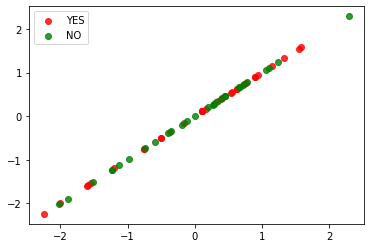

In [43]:
#define data to plot
X = test_data[['A','B','C']]
y = test_data['STATUS']
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
print(data_plot.shape)
target_names = ['YES','NO']
#create LDA plot
plt.figure()
colors = ['red', 'green']
lw = 2
for color, i, target_name in zip(colors, ['YES','NO'], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 0], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()
